In [1]:
import numpy as np
import pandas as pd
from Bio import pairwise2
from Bio.Align import substitution_matrices
from os import path
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import multiprocessing

In [3]:
MATRIX = substitution_matrices.load("BLOSUM80")

In [4]:
score = pairwise2.align.globalds("ACCGT", "ACG", MATRIX, -10, -0.5, score_only=True)
score

9.0

In [4]:
DATA_DIR = "../../data"

In [5]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/chen_data.csv"))
chen_data

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0
...,...,...,...,...
2404,6s5a,EVKLLESGGGLVQPGGSLKLSCAASGFDFSRYWMNWVRQAPGKGLE...,QAVVTQESALTTSPGETVTLTCRSSTGAVTTSNYANWVQEKPDHLF...,0
2405,6tyb,EVQLVQSGTEVKRPGESLTISCKTSGYSFSGTWISWVRQMPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGISTYLAWYQQKPGKAPKL...,0
2406,6u1t,EVQLVESGGGLVKPGGSLKLSCAASGFTFSSYDMSWVRQTPEKRLE...,DIQMTQSPASQSASLGESVTITCLASQTIGTWLAWYQQKPGKSPQL...,0
2407,7fab,AVQLEQSGPGLVRPSQTLSLTCTVSGTSFDDYYWTWVRQPPGRGLE...,ASVLTQPPSVSGAPGQRVTISCTGSSSNIGAGHNVKWYQQLPGTAP...,0


In [6]:
def score_seqs(seq1, seq2):
    score = pairwise2.align.globalds(seq1, seq2, MATRIX, -6, -0.5, score_only=True)
    return score

In [8]:
heavy = chen_data["heavy"]

In [9]:
heavy_small = heavy.iloc[:5]

In [10]:
class CompareSeq:
    def __init__(self, seq):
        self.seq = seq
        
    def score(self, seq2):
        return score_seqs(self.seq, seq2)

In [12]:
def compare_row(seq, index, all_seqs):
    remains = len(all_seqs) - index
    if remains < 1:
        return np.zeros(len(all_seqs))
    rest_of_row = all_seqs[index:]
    pool = multiprocessing.Pool(6)
    comparison = CompareSeq(seq)
    scores = pool.map(comparison.score, rest_of_row)
    scores_int = np.fromiter(scores, dtype=int)
    scores_filled = np.concatenate((np.zeros(index), scores_int))
    return  scores_filled

In [13]:
# heavy
distances = [compare_row(s, i, heavy_small) for i, s in enumerate(tqdm(heavy_small))]
#distances = list(map(lambda s: compare_row(s, heavy_small), tqdm(heavy_small)))
distance_matrix = np.stack(distances)
distance_matrix

100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


array([[1048.,  770.,  657.,  638.,  444.],
       [   0., 1038.,  715.,  675.,  468.],
       [   0.,    0., 1020.,  738.,  470.],
       [   0.,    0.,    0., 1050.,  493.],
       [   0.,    0.,    0.,    0., 1005.]])

Process ForkPoolWorker-29:
Process ForkPoolWorker-5:
Process ForkPoolWorker-26:
Process ForkPoolWorker-11:
Process ForkPoolWorker-15:
Process ForkPoolWorker-7:
Process ForkPoolWorker-19:
Process ForkPoolWorker-14:
Process ForkPoolWorker-9:
Process ForkPoolWorker-16:
Process ForkPoolWorker-30:
Process ForkPoolWorker-4:
Process ForkPoolWorker-25:
Process ForkPoolWorker-17:
Process ForkPoolWorker-10:
Process ForkPoolWorker-1:
Process ForkPoolWorker-21:
Process ForkPoolWorker-23:
Process ForkPoolWorker-6:
Process ForkPoolWorker-22:
Process ForkPoolWorker-20:
Process ForkPoolWorker-18:
Process ForkPoolWorker-3:
Process ForkPoolWorker-27:
Process ForkPoolWorker-24:
Process ForkPoolWorker-28:
Process ForkPoolWorker-13:
Process ForkPoolWorker-12:
Process ForkPoolWorker-2:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/brazdilv/.conda/envs/ml/lib/python3.7/multipr

In [14]:
# heavy
distances = [compare_row(s, i, heavy) for i, s in enumerate(tqdm(heavy))]
#distances = list(map(lambda s: compare_row(s, heavy), tqdm(heavy)))
distance_matrix = np.stack(distances)
distance_matrix

  1%|          | 13/2409 [1:07:23<197:57:11, 297.43s/it]Process ForkPoolWorker-31:
Process ForkPoolWorker-45:
Process ForkPoolWorker-41:
Process ForkPoolWorker-36:
Process ForkPoolWorker-94:
Process ForkPoolWorker-57:
Process ForkPoolWorker-106:
Process ForkPoolWorker-105:
Process ForkPoolWorker-88:
Process ForkPoolWorker-74:
Process ForkPoolWorker-66:
Process ForkPoolWorker-76:
Process ForkPoolWorker-52:
Process ForkPoolWorker-100:
Process ForkPoolWorker-91:
Process ForkPoolWorker-61:
Process ForkPoolWorker-48:
Process ForkPoolWorker-35:
Process ForkPoolWorker-101:
Process ForkPoolWorker-77:
Process ForkPoolWorker-40:
Process ForkPoolWorker-103:
Process ForkPoolWorker-104:
Process ForkPoolWorker-43:
Process ForkPoolWorker-50:
Process ForkPoolWorker-108:
Process ForkPoolWorker-64:
Process ForkPoolWorker-55:
Process ForkPoolWorker-86:
Process ForkPoolWorker-99:
Process ForkPoolWorker-63:
Process ForkPoolWorker-80:
Process ForkPoolWorker-68:
Process ForkPoolWorker-73:
Process ForkPoolWor

KeyboardInterrupt: 

Process ForkPoolWorker-140:
Process ForkPoolWorker-176:
Process ForkPoolWorker-165:
Process ForkPoolWorker-212:
Process ForkPoolWorker-210:
Process ForkPoolWorker-181:
Process ForkPoolWorker-195:
Process ForkPoolWorker-170:
Process ForkPoolWorker-130:
Process ForkPoolWorker-209:
Process ForkPoolWorker-201:
Process ForkPoolWorker-205:
Process ForkPoolWorker-214:
Process ForkPoolWorker-118:
Process ForkPoolWorker-190:
Process ForkPoolWorker-174:
Process ForkPoolWorker-151:
Process ForkPoolWorker-153:
Process ForkPoolWorker-199:
Process ForkPoolWorker-206:
Process ForkPoolWorker-161:
Process ForkPoolWorker-193:
Process ForkPoolWorker-219:
Process ForkPoolWorker-187:
Process ForkPoolWorker-226:
Process ForkPoolWorker-202:
Process ForkPoolWorker-198:
Process ForkPoolWorker-137:
Process ForkPoolWorker-227:
Process ForkPoolWorker-217:
Process ForkPoolWorker-150:
Process ForkPoolWorker-146:
Process ForkPoolWorker-208:
Process ForkPoolWorker-133:
Process ForkPoolWorker-175:
Process ForkPoolWork

In [ ]:
np.savetxt(path.join(DATA_DIR, "chen/distances/pairwise_scores_heavy.csv"), distance_matrix, delimiter=';')

In [ ]:
light = chen_data["light"]

In [ ]:
# light
distances = list(map(lambda s: compare_row(s, light), tqdm(light)))
distance_matrix_l = np.stack(distances)
distance_matrix_l

In [ ]:
np.savetxt(path.join(DATA_DIR, "chen/distances/pairwise_scores_light.csv"), distance_matrix_l, delimiter=';')

In [ ]:
# convert similarity to distance
def sim_to_dist(sim_matrix):
    max_score = np.amax(sim_matrix)
    dist_matrix = max_score = sim_matrix

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# clustering
def cluster_sequences(dist_matrix, sequences):
    clustering = AgglomerativeClustering(affinity='precomputed', linkage='complete')
    clustering.fit(dist_matrix)
    # create df with sequences and cluster labels?
    return clustering

## Try to get dist matrix using usearch

In [17]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import SeqIO


In [7]:
WORK_DIR = path.join(DATA_DIR, "tmp")

In [20]:
def record_from_row(row):
    rec_heavy = SeqRecord(seq=Seq(row["heavy"]), id=row["Antibody_ID"], description="")
    rec_light = SeqRecord(seq=Seq(row["light"]), id=row["Antibody_ID"], description="")
    return rec_heavy, rec_light

In [21]:
fastas = chen_data.apply(record_from_row, axis=1, result_type="expand")
fastas

,0,1
0,"(E, V, Q, L, Q, Q, S, G, A, E, V, V, R, S, G, ...","(D, I, V, M, T, Q, S, Q, K, F, M, S, T, S, V, ..."
1,"(E, V, Q, L, Q, Q, S, G, A, E, L, V, K, P, G, ...","(D, I, V, L, T, Q, S, P, A, I, M, S, A, S, L, ..."
2,"(E, V, Q, L, Q, E, S, D, A, E, L, V, K, P, G, ...","(D, I, E, L, T, Q, S, P, S, S, L, S, A, S, L, ..."
3,"(Q, V, Q, L, Q, Q, S, G, A, E, L, V, K, P, G, ...","(D, I, E, L, T, Q, T, T, S, S, L, S, A, S, L, ..."
4,"(Q, V, Q, L, Q, E, S, G, P, G, L, V, A, P, S, ...","(D, I, V, L, T, Q, S, P, A, S, L, S, A, S, V, ..."
...,...,...
2404,"(E, V, K, L, L, E, S, G, G, G, L, V, Q, P, G, ...","(Q, A, V, V, T, Q, E, S, A, L, T, T, S, P, G, ..."
2405,"(E, V, Q, L, V, Q, S, G, T, E, V, K, R, P, G, ...","(D, I, Q, M, T, Q, S, P, S, S, L, S, A, S, V, ..."
2406,"(E, V, Q, L, V, E, S, G, G, G, L, V, K, P, G, ...","(D, I, Q, M, T, Q, S, P, A, S, Q, S, A, S, L, ..."
2407,"(A, V, Q, L, E, Q, S, G, P, G, L, V, R, P, S, ...","(A, S, V, L, T, Q, P, P, S, V, S, G, A, P, G, ..."


In [22]:
heavy_file_name = "chen_heavy.fa"
light_file_name = "chen_light.fa"

In [23]:
SeqIO.write(list(fastas[0]), path.join(WORK_DIR, heavy_file_name), "fasta")
SeqIO.write(list(fastas[1]), path.join(WORK_DIR, light_file_name), "fasta")

2409

In [49]:
# use USEARCH to get distance matrix of all heavy chains
! ../../../SW/usearch -calc_distmx ../../data/tmp/chen_heavy.fa -distmx_brute -tabbedout ../../data/tmp/heavy_mtx.txt 

usearch v11.0.667_i86linux32, 4.0Gb RAM (65.7Gb total), 48 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

00:00 41Mb    100.0% Reading ../../data/tmp/chen_heavy.fa
00:00 7.3Mb  CPU has 48 cores, defaulting to 10 threads  


00:00 49Mb    100.0% Word stats
00:00 49Mb    100.0% Alloc rows
00:00 50Mb    100.0% Build index
00:01 155Mb   100.0% Distance matrix/usort




In [25]:
# same for light chains
! ../../../SW/usearch -calc_distmx ../../data/tmp/chen_light.fa -tabbedout ../../data/tmp/light_mtx.txt -distmx_brute

usearch v11.0.667_i86linux32, 4.0Gb RAM (65.7Gb total), 48 cores
(C) Copyright 2013-18 Robert C. Edgar, all rights reserved.
https://drive5.com/usearch

License: personal use only

00:00 41Mb    100.0% Reading ../../data/tmp/chen_light.fa
00:00 7.3Mb  CPU has 48 cores, defaulting to 10 threads  


00:00 49Mb    100.0% Word stats
00:00 49Mb    100.0% Alloc rows
00:00 50Mb    100.0% Build index
00:00 155Mb   100.0% Distance matrix/usort




In [28]:
from scipy import sparse

In [69]:
def load_sparse_dist_matrix(distance_path):
    dist_matrix = pd.read_csv(distance_path, header=None, sep='\t')
    
    diagonal = dist_matrix[0] == dist_matrix[1]
    row = np.concatenate([dist_matrix[0], dist_matrix[1][~diagonal]])
    col = np.concatenate([dist_matrix[1], dist_matrix[0][~diagonal]])
    data = 1 -np.concatenate([dist_matrix[2], dist_matrix[2][~diagonal]])
    
    name2idx = { name: idx for idx, name in enumerate(chen_data["Antibody_ID"]) }
    idx2name = { idx: name for idx, name in enumerate(chen_data["Antibody_ID"]) }
    
    row_int = [name2idx[name] for name in row]
    col_int = [name2idx[name] for name in col]
    
    dist_matrix = sparse.csr_matrix((data, (row_int, col_int)), dtype=np.float32)
    return 1 - dist_matrix.toarray()

In [70]:
dist_mat = load_sparse_dist_matrix(path.join(WORK_DIR, "heavy_mtx.txt"))

## Now back to clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
def cluster_sequences(dist_matrix, sequences):
    clustering = AgglomerativeClustering(affinity='precomputed', linkage='complete')
    clustering.fit(dist_matrix)
    # create df with sequences and cluster labels?
    labelled = pd.DataFrame({"Ab_ID": chen_data["Antibody_ID"], "cluster": clustering.labels_})
    return labelled

In [76]:
clusters = cluster_sequences(dist_mat, chen_data["Antibody_ID"])

In [77]:
clusters["cluster"].value_counts()

0    2397
1      12
Name: cluster, dtype: int64

In [68]:
chen_data["Antibody_ID"].head(10)

0    12e8
1    15c8
2    1a0q
3    1a14
4    1a2y
5    1a3l
6    1a3r
7    1a4j
8    1a4k
9    1a5f
Name: Antibody_ID, dtype: object

## Let's try alignment by abnumber

In [11]:
from abnumber import Chain
import numpy as np
import pandas as pd
from os import path

In [19]:
import multiprocessing

In [15]:
def chainify(seq):
    try:
        ch = Chain(seq, scheme="imgt")
        return ch
    except NotImplementedError as e:
        return None

In [27]:
def score_chains(chain1, chain2):
    if chain2 is None:
        return np.nan
    alignment = chain1.align(chain2)
    score = alignment.num_mutations()
    return score

In [16]:
heavy_chains = [chainify(h_seq) for h_seq in chen_data["heavy"]]
light_chains = [chainify(l_seq) for l_seq in chen_data["light"]]

In [7]:
class CompareChain:
    def __init__(self, seq):
        self.seq = seq
        
    def score(self, seq2):
        return score_chains(self.seq, seq2)

In [30]:
def compare_row(seq, index, all_seqs):
    remains = len(all_seqs) - index
    if remains < 1 or seq is None:
        return np.array([np.nan]*len(all_seqs))
    rest_of_row = all_seqs[index:]
    pool = multiprocessing.Pool(2)
    comparison = CompareChain(seq)
    scores = pool.map(comparison.score, rest_of_row)
    scores_int = np.fromiter(scores, dtype=float)
    scores_filled = np.concatenate((np.array([np.nan]*index), scores_int))
    return  scores_filled

In [31]:
distances = [compare_row(s, i, heavy_chains) for i, s in enumerate(heavy_chains)]
#distances = list(map(lambda s: compare_row(s, heavy), tqdm(heavy)))
distance_matrix = np.stack(distances)

In [32]:
distance_matrix

array([[ 0., 29., 44., ..., 57., 63., 63.],
       [nan,  0., 37., ..., 58., 63., 63.],
       [nan, nan,  0., ..., 62., 74., 68.],
       ...,
       [nan, nan, nan, ...,  0., 68., 39.],
       [nan, nan, nan, ..., nan,  0., 67.],
       [nan, nan, nan, ..., nan, nan,  0.]])

In [33]:
np.savetxt(path.join(DATA_DIR, "chen/distances/pairwise_abnumber_scores_heavy.csv"), distance_matrix, delimiter=';')

In [34]:
distances_l = [compare_row(s, i, light_chains) for i, s in enumerate(light_chains)]
distance_matrix_l = np.stack(distances)

In [35]:
distance_matrix_l

array([[ 0., 29., 44., ..., 57., 63., 63.],
       [nan,  0., 37., ..., 58., 63., 63.],
       [nan, nan,  0., ..., 62., 74., 68.],
       ...,
       [nan, nan, nan, ...,  0., 68., 39.],
       [nan, nan, nan, ..., nan,  0., 67.],
       [nan, nan, nan, ..., nan, nan,  0.]])

In [36]:
np.savetxt(path.join(DATA_DIR, "chen/distances/pairwise_abnumber_scores_light.csv"), distance_matrix_l, delimiter=';')

## use precomputed ANARCI matrix

In [6]:
heavy_df = pd.read_csv(path.join(DATA_DIR, "chen/abnumber/chen_heavy_chain_numbering.csv"))
light_df = pd.read_csv(path.join(DATA_DIR, "chen/abnumber/chen_light_chain_numbering.csv"))
heavy_df.head()

,Ab_ID,chain_type,species,1,2,3,3A,4,4A,5,...,119,120,121,122,123,124,125,126,127,128
0,12e8,H,mouse,E,V,Q,-,L,-,Q,...,G,Q,G,T,L,V,T,V,S,A
1,15c8,H,mouse,E,V,Q,-,L,-,Q,...,G,Q,G,T,T,L,T,V,S,S
2,1a0q,H,mouse,E,V,Q,-,L,-,Q,...,G,Q,G,T,T,L,T,V,S,S
3,1a14,H,mouse,Q,V,Q,-,L,-,Q,...,G,Q,G,T,T,V,T,V,-,-
4,1a2y,H,mouse,Q,V,Q,-,L,-,Q,...,G,Q,G,T,T,L,T,V,S,S


In [7]:
def anarci_similarity_matrix(anarci_df):
    pos_columns = [col for col in anarci_df.columns if col[0].isnumeric()]
    positions = anarci_df[pos_columns]
    tasks = [(row, positions) for i, row in positions.iterrows()]
    rows = tqdm(map(identity_task, tasks), total=len(tasks), position=0, leave=True)
    matrix = pd.DataFrame(rows)
    matrix.index = matrix.columns
    return matrix

def identity_task(task):
    seq, seqs = task
    return seqs.apply(all_position_identity, seq2=seq, axis=1).astype(np.float16)

def all_position_identity(seq1, seq2):
    return (seq1 == seq2).mean()

In [8]:
heavy_similarity = anarci_similarity_matrix(heavy_df)
heavy_similarity.head()

100%|██████████| 2407/2407 [20:22<00:00,  1.97it/s]


,0,1,2,3,4,5,6,7,8,9,...,2397,2398,2399,2400,2401,2402,2403,2404,2405,2406
0,1.000000,0.857910,0.784180,0.769531,0.656738,0.759766,0.857910,0.686035,0.686035,0.818848,...,0.686035,0.691406,0.745117,0.686035,0.691406,0.710938,0.696289,0.720703,0.691406,0.691406
1,0.857910,1.000000,0.818848,0.789062,0.676270,0.774414,0.887207,0.681152,0.681152,0.857910,...,0.710938,0.696289,0.750000,0.696289,0.706055,0.686035,0.671387,0.715820,0.691406,0.691406
2,0.784180,0.818848,1.000000,0.818848,0.676270,0.813965,0.789062,0.725586,0.725586,0.793945,...,0.715820,0.681152,0.750000,0.691406,0.706055,0.676270,0.676270,0.696289,0.637207,0.666504
3,0.769531,0.789062,0.818848,1.000000,0.656738,0.808594,0.754883,0.701172,0.701172,0.793945,...,0.676270,0.701172,0.759766,0.715820,0.740234,0.671387,0.686035,0.691406,0.656738,0.691406
4,0.656738,0.676270,0.676270,0.656738,1.000000,0.666504,0.666504,0.686035,0.686035,0.676270,...,0.696289,0.725586,0.661621,0.656738,0.656738,0.696289,0.651855,0.706055,0.720703,0.706055


In [11]:
np.savetxt(path.join(DATA_DIR, "chen/distances/anarci_similarity_heavy.csv"), heavy_similarity, delimiter=';')

In [9]:
import umap
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [14]:
def fit_umap(df, n_components=2, random_state=0, **kwargs):
    reducer = umap.UMAP(n_components=n_components, random_state=random_state, metric='precomputed', **kwargs)
    embedding = reducer.fit_transform(df)
    return reducer, pd.DataFrame(embedding, columns=[f'UMAP-{i+1}' for i in range(n_components)], index=df.index)

In [15]:
vh_reducer, vh_umap = fit_umap(1-heavy_similarity, n_neighbors=10)
vh_umap.head()

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


,UMAP-1,UMAP-2
0,-22.509872,-22.803427
1,-22.868769,-22.867229
2,-4.697710,1.088842
3,-5.369852,1.057855
4,6.806503,16.705387


In [16]:
def agglomerative_clustering(distance, linkage='complete', **kwargs):
    clusters = AgglomerativeClustering(linkage=linkage, affinity='precomputed', **kwargs).fit(distance).labels_
    return pd.Series(clusters+1, distance.index)

In [24]:
vh_clusters = agglomerative_clustering(
    1-heavy_similarity, 
    n_clusters=None, 
    distance_threshold=0.4, 
    linkage='complete'
)

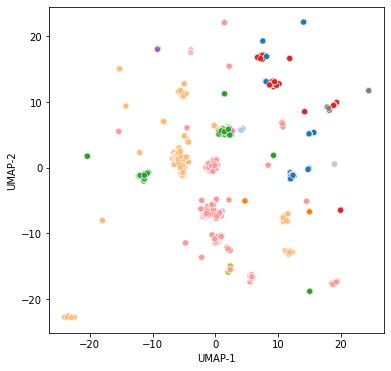

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(
    data=vh_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue=vh_clusters,
    palette='tab20',
    ax=ax,
    legend=False,
)

In [26]:
vh_clusters.max()

17

### Light

In [12]:
light_similarity = anarci_similarity_matrix(light_df)
light_similarity.head()

100%|██████████| 2409/2409 [19:44<00:00,  2.03it/s]


,0,1,2,3,4,5,6,7,8,9,...,2399,2400,2401,2402,2403,2404,2405,2406,2407,2408
0,1.000000,0.695801,0.623047,0.630371,0.645020,0.586914,0.703125,0.652344,0.652344,0.703125,...,0.347900,0.572266,0.558105,0.550781,0.709961,0.500000,0.384033,0.688477,0.528809,0.565430
1,0.695801,1.000000,0.681152,0.681152,0.709961,0.630371,0.637695,0.630371,0.630371,0.637695,...,0.333252,0.608887,0.594238,0.565430,0.681152,0.528809,0.434814,0.717285,0.586914,0.572266
2,0.623047,0.681152,1.000000,0.703125,0.709961,0.565430,0.623047,0.565430,0.565430,0.623047,...,0.333252,0.528809,0.550781,0.550781,0.681152,0.500000,0.434814,0.703125,0.514648,0.550781
3,0.630371,0.681152,0.703125,1.000000,0.666504,0.565430,0.572266,0.608887,0.608887,0.572266,...,0.311523,0.572266,0.558105,0.521973,0.673828,0.514648,0.413086,0.652344,0.507324,0.536133
4,0.645020,0.709961,0.709961,0.666504,1.000000,0.594238,0.623047,0.594238,0.594238,0.623047,...,0.347900,0.558105,0.543457,0.543457,0.703125,0.543457,0.434814,0.818848,0.521973,0.565430


In [13]:
np.savetxt(path.join(DATA_DIR, "chen/distances/anarci_similarity_light.csv"), light_similarity, delimiter=';')

In [27]:
vl_reducer, vl_umap = fit_umap(1-light_similarity, n_neighbors=10)
vl_umap.head()

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/umap/umap_.py:1736: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  "using precomputed metric; transform will be unavailable for new data and inverse_transform "


,UMAP-1,UMAP-2
0,8.604904,8.193730
1,-8.803350,-5.699873
2,-10.007228,8.364964
3,-13.026506,15.494286
4,-5.814436,-6.331754


In [28]:
vl_clusters = agglomerative_clustering(
    1-light_similarity, 
    n_clusters=None, 
    distance_threshold=0.4, 
    linkage='complete'
)

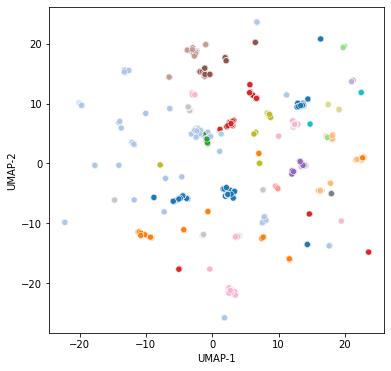

In [29]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(
    data=vl_umap,
    x='UMAP-1',
    y='UMAP-2',
    hue=vl_clusters,
    palette='tab20',
    ax=ax,
    legend=False,
)

## Alignment based clustering

In [7]:
from multiprocessing import Pool
from statistics import mean

In [8]:
class Matrix:
    def __init__(self, matrix_filename):
        self._load_matrix(matrix_filename)

    def _load_matrix(self, matrix_filename):
        with open(matrix_filename) as matrix_file:
            matrix = matrix_file.read()
        lines = matrix.strip().split('\n')

        header = lines.pop(0)
        columns = header.split()
        matrix = {}

        for row in lines:
            entries = row.split()
            row_name = entries.pop(0)
            matrix[row_name] = {}

            if len(entries) != len(columns):
                raise Exception('Improper entry number in row')
            for column_name in columns:
                matrix[row_name][column_name] = int(entries.pop(0))

        self._matrix = matrix

    def lookup_score(self, a, b):
        a = a.upper()
        b = b.upper()

        if a not in self._matrix or b not in self._matrix[a]:
            print(a, b)
            raise InvalidPairException('[%s, %s]' % (a, b))
        return self._matrix[a][b]
    
    def score_sequences(self, seq1, seq2):
        score = 0
        for i in range(len(seq1)):
            score += self.lookup_score(seq1[i], seq2[i])
        return score


blosum62 = Matrix("blosum62.txt")

In [9]:
def sequence_similarity(seq1, seq2):
    assert len(seq1) == len(seq2)
    score = blosum62.score_sequences(seq1, seq2)
    max_score = max(blosum62.score_sequences(seq1, seq1), blosum62.score_sequences(seq2,seq2))
    return score / max_score

In [10]:
def similarity_task(parameters):
    seq, seqlist = parameters
    seqs = pd.Series(seqlist)
    #return seqs.apply(sequence_similarity, seq2=seq).astype(np.float16)
    return seqs.apply(score_seqs, seq2=seq).astype(np.float16)


def similarity_matrix(seqlist, nproc=2):
    tasks = [(seq, seqlist) for seq in seqlist]
    pool = Pool(nproc)
    #rows = tqdm(map(similarity_task, tasks), total=len(tasks), position=0, leave=True)
    rows = tqdm(pool.imap(similarity_task, tasks), total=len(tasks), position=0, leave=True)
    matrix = pd.DataFrame(rows)
    matrix.columns = seqlist
    matrix.index = matrix.columns
    return matrix

In [11]:
vh_similarity_matrix = similarity_matrix(chen_data["heavy"], nproc=4)

  0%|          | 0/2409 [26:42<?, ?it/s]Process ForkPoolWorker-1:

Process ForkPoolWorker-3:
Process ForkPoolWorker-4:
Process ForkPoolWorker-2:


KeyboardInterrupt: 

In [ ]:
np.savetxt(path.join(DATA_DIR, "chen/distances/alignment_similarity_heavy.csv"), vh_similarity_matrix, delimiter=';')

In [ ]:
vl_similarity_matrix = similarity_matrix(chen_data["light"], nproc=4)

In [ ]:
np.savetxt(path.join(DATA_DIR, "chen/distances/alignment_similarity_light.csv"), vl_similarity_matrix, delimiter=';')